In [1]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [2]:
train_data = '/Users/sean/Documents/University_of_denver/Deep Learning/Final Project/Data/slimmed_data/train'
test_data = '/Users/sean/Documents/University_of_denver/Deep Learning/Final Project/Data/slimmed_data/test'
val_data = '/Users/sean/Documents/University_of_denver/Deep Learning/Final Project/Data/slimmed_data/valid'

In [3]:
augmented_gen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [4]:
general_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = general_datagen.flow_from_directory(
    train_data,
    target_size = (224, 224),
    batch_size = 32
)
val_generator = general_datagen.flow_from_directory(
    val_data,
    target_size = (224, 224),
    batch_size = 32
)
test_generator = general_datagen.flow_from_directory(
    test_data,
    target_size = (224, 224),
    batch_size = 32
)

Found 1927 images belonging to 12 classes.
Found 60 images belonging to 12 classes.
Found 60 images belonging to 12 classes.


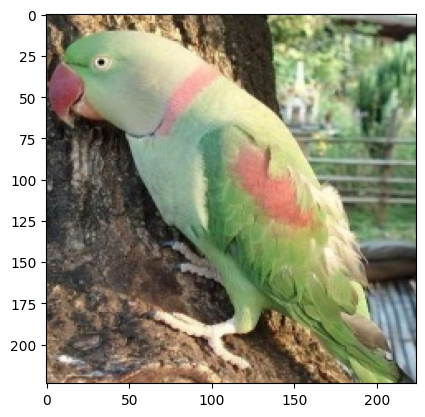

In [6]:
def plot_image(generator):
    images_in_batch = next(generator) # images_in_batch will output (batch_size, height, width, n_channels)
    img = images_in_batch[0][0] # img will output (height, width, n_chennels)
    
    plt.imshow(img)

plot_image(train_generator)

In [7]:
train_groups = len(train_generator) 
val_groups = len(val_generator) # validation_step

print(f"Train groups: {train_groups}")
print(f"Validation groups: {val_groups}")

Train groups: 61
Validation groups: 2


In [11]:
model_path = "/Users/sean/Documents/University_of_denver/Deep Learning/Final Project/EfficientNetB0-525-(224 X 224)- 98.97.h5"
model= keras.models.load_model(model_path, custom_objects={'F1_score':'F1_score'})

In [12]:
#Removing the output layer
model.layers.pop()

# creating a new output layer w/ 12 nodes for the subset of data I chose
outlayer = Dense(12, activation='softmax')
output = outlayer(model.output)
model = Model(inputs=model.input, outputs=output)
model.compile(optimizer =keras.optimizers.legacy.Adam(learning_rate = 1),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [13]:
model.fit(
    train_generator,
    steps_per_epoch=train_groups,
    epochs= 10,
    validation_data=val_generator,
    validation_steps=val_groups,
    verbose=1)


Epoch 1/10
61/61 [==============================] - 64s 995ms/step - loss: 806.1721 - accuracy: 0.0841 - val_loss: 4571598946304.0000 - val_accuracy: 0.0833
Epoch 2/10
61/61 [==============================] - 62s 1s/step - loss: 508.2771 - accuracy: 0.0893 - val_loss: 1422.4623 - val_accuracy: 0.0833
Epoch 3/10
61/61 [==============================] - 62s 1s/step - loss: 1223.1478 - accuracy: 0.0856 - val_loss: 997.1151 - val_accuracy: 0.0833
Epoch 4/10
61/61 [==============================] - 64s 1s/step - loss: 600.6938 - accuracy: 0.0758 - val_loss: 626.9894 - val_accuracy: 0.0833
Epoch 5/10
61/61 [==============================] - 70s 1s/step - loss: 1092.9703 - accuracy: 0.0856 - val_loss: 3636.8904 - val_accuracy: 0.0833
Epoch 6/10
35/61 [================>.............] - ETA: 27s - loss: 2001.1414 - accuracy: 0.0932

KeyboardInterrupt: 